<a href="https://colab.research.google.com/github/Michael-Holland-Dev/CS180/blob/main/data_science_labs/data_science_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BYU CS 180 Lab 10: Machine Learning with Scikit-Learn

In [ ]:
# Dependencies for the lab
import matplotlib.pyplot as plt
import numpy as np

## Introduction:
Introduction:
Scikit-learn is a very popular library for machine learning in Python. You can think of it as an add-on to scipy/numpy with a very large number of implementations of common machine learning algorithms.

In general, the scikit-learn API can help you accomplish the following tasks:
* Preprocessing
* Dimensionality Reduction
* Clustering
* Classification
* Regression

Lab Objective:

Learn and become proficient at using different machine learning algorithms in the Scikit-Learn tool set.

For this lab you will need to create a number of plots where each point is given a different color. You can do this using matplotlib. The basic idea is you can create an array of colors and an array of indices

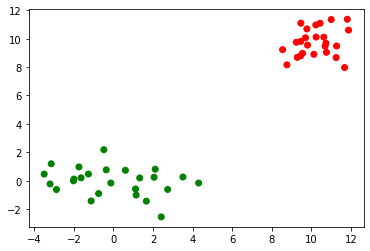

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

n = 25

x1 = np.random.multivariate_normal([10, 10], cov=np.eye(2), size=n)
x1_idx = np.zeros(n, dtype=int)

x2 = np.random.multivariate_normal([0, 0], cov=np.array([[5, 0], [0, 1]]), size=n)
x2_idx = np.ones(n, dtype=int)

X = np.concatenate([x1, x2], axis=0)
X_idx = np.concatenate([x1_idx, x2_idx])

# create the plot and index into the colors array
plt.scatter(X[:, 0], X[:, 1], c=colors[X_idx])

## Exercise 1: Clusters!

In this exercise, you will train three different clustering algorithms on three different datasets. 

### Algorithms:
#### K-means 
* [Overview](https://scikit-learn.org/stable/modules/clustering.html#k-means)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

#### DBScan: 

* [Overview](https://scikit-learn.org/stable/modules/clustering.html#dbscan)
* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)

#### GMM: 

* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

After reading the above documentation (You can skim it) attempt to explain to me like I'm five, what these algorithms are doing:
 

Explain how K-Means works?

**Pick K number of centroids and put them randomly on your data. Seperate your points into groups by tagging them with the centroid each point is closest to. Then for each tagged group, move your centroid to the average location of all the points in the group. Repeat until yours centroids don't move.**

Explain how DBScan works?

**Set the eps, or minimum distance two points need to be considered neighbors, and the min_samples, which is the number of neighbor points needed to make a dense region. Go through each point and incrementally see how many points are within eps of it--if it meets or exceeds the min_samples number, then that point is in a dense region.**

Explain how GMM works?

**GMM assumes that every point is part of a normal distribution--the spread of points is based on probabilities with multiple clusters. Each point is placed in a cluster based on the probability method you choose.**

#### Datasets:
We will generate three toy datasets using the scikit-learn api, which you can do with the following code:

In [ ]:
from sklearn import datasets
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)[0]
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)[0]
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]

This generates three datasets, `noisy_circles`, `noisy_moons`, and `blobs`

Your Task: 
* We want you to train each clustering algorithm on each dataset (you should have a total of 9 plots).
* For each dataset/algorithm, plot the points. Color the points using the cluster the belong to

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=200)

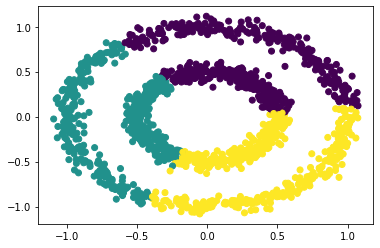

In [16]:
kmeans.fit(noisy_circles)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=kmeans.labels_)

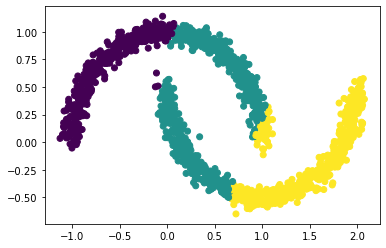

In [12]:
kmeans.fit(noisy_moons)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=kmeans.labels_)

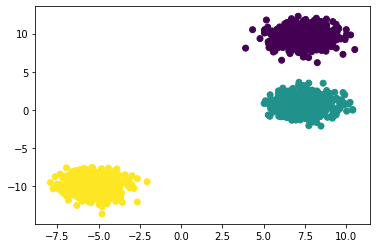

In [13]:
kmeans.fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=kmeans.labels_)

In [44]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.15, min_samples=5)

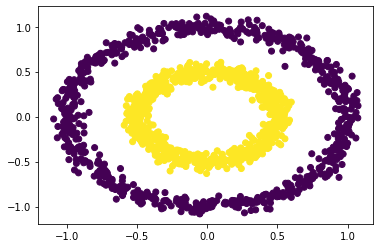

In [45]:
db.fit(noisy_circles)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=db.labels_)

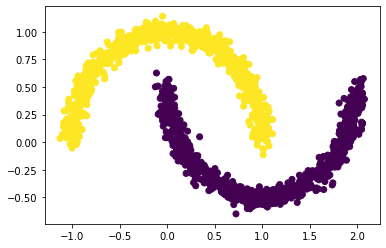

In [46]:
db.fit(noisy_moons)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=db.labels_)

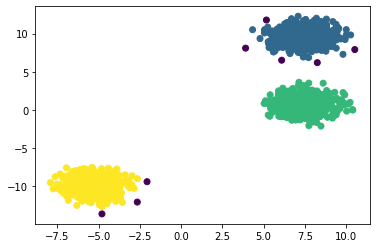

In [59]:
db = DBSCAN(eps=1, min_samples=20)
db.fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=db.labels_)

In [66]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0)

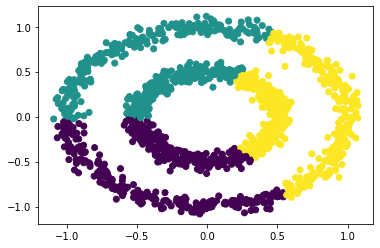

In [67]:
labels = gm.fit_predict(noisy_circles)
plt.scatter(noisy_circles[:,0], noisy_circles[:,1], c=labels)

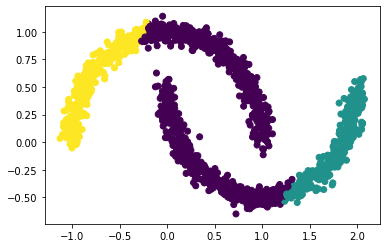

In [68]:
labels = gm.fit_predict(noisy_moons)
plt.scatter(noisy_moons[:,0], noisy_moons[:,1], c=labels)

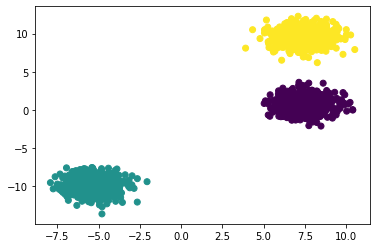

In [69]:
labels = gm.fit_predict(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=labels)

## Exercise 2: Flower Power Returns


In the previous exercise we looked simple datasets with 2 dimensions (features). In real life, we often have many more variables than. Clustering algorithms can also be applied to higher dimensional data. For this exercise train k-means on the Iris dataset, which has 4 dimensions (features). This is difficult visualize so we will also apply a dimensionality technique to the data to reduce to 2-D strictly to create a plot.

### Dataset
Download the iris dataset and cast to a numpy array

In [70]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname='iris', package='datasets').data
X = df.iloc[:, :4].values

We know the iris dataset has three classes `['setosa', 'versicolor', 'virginica']`

Your Task: 
* Train K-means on the iris dataset with 3 clusters

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
clusters = kmeans.cluster_centers_
# your code goes here
# clusters = get predicted clusters indices

Now let’s visualize the clusters by reducing the feature space to 2-D. This will allow us to create a plot. We will use T-distributed Stochastic Neighbor Embedding [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [74]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_reduced = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Your Task:
* Create a plot using X_reduced, where each point is colored according to its cluster id.

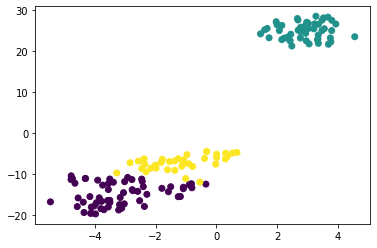

In [76]:
#Enter your code for the X_reduced plot here.
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)


Comment on your observations. Were we successfully able to group samples together without labels?

**Yeah pretty well. The turquiose group is distinctly clear, and the yellow and purple groups border each other but are also seperate. This wouldn't have been possible if I'd just tried KMeans on this already reduced dimensional set.**

## Exercise 3: Split the Data

Use the train_test_split() function in sklearn (sklearn.model_selection.train_test_split ) to split the iris data set. Report the number of samples in both the train and test set.

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, kmeans.labels_)

In [85]:
X_train.shape

(112, 4)

In [86]:
X_test.shape

(38, 4)

What is the number of samples in the train set?

122

What is the number of samples in the test set?

38

## Exercise 4: K Nearest Neighbors

Your Task: 
* Train a K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier ) on the iris data.

* Train your KNN when the n_neighbors parameter is 5. Report your train accuracy and test accuracy

* Perform a grid search over the parameter n_neighbors over the range 1-20:

* For each value of n_neighbors, fit a KNN and record your train and test accuracy

* Create a plot showing the test/train accuracy over the n_neighbors



In [87]:
# Enter your code for Exercise 4 here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [106]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
knn.score(X_train, y_train)

0.9910714285714286

In [108]:
knn.score(X_test, y_test)

1.0

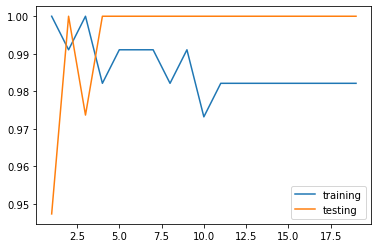

In [114]:
train_accuracies = []
test_accuracies = []
for k in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_accuracies.append(knn.score(X_train, y_train))
  test_accuracies.append(knn.score(X_test, y_test))
x = np.arange(1, 20)
plt.plot(x, train_accuracies, label="training")
plt.plot(x, test_accuracies, label="testing")
plt.legend()

What is your train accuracy and test accuracy for when the n_neighbors parameter is 5

Train accuracy: 99.107%

Test accuracy: 100%

Discuss what you learn. How does train and test accuracy behave as you change the number of neighbors?

**It appears from the graph that accuracy decreases a little bit for the training data while staying pretty high for the test data, except for at the start. Honestly though it's all super close to 100% so this isn't that noteworthy. I assume that there is a sweet spot though--if you were to keep increasing the number of nearest neighbors, you might stretch beyond the bounds of the group you are actually part of.**

**It's a really interesting algorithm though. I wonder how robust it would be with something like the smiley face, especially if there wasn't that many points to go off of.**